## Nanoribbons of graphene

### Define and diagonalize the Hamilton matrix

\\( H = \begin{pmatrix} 
0 & pb & 0 & 0 & \dots \\ 
bp & 0 & br & 0 & \dots \\ 
0 & rb & 0 & rg & \dots \\ 
0 & 0 & gr & 0 & \dots \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} \\)

Two-dimensional band structure of graphene

Classical electrons: \\( E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2\\)

Relativistic electrons: \\( E(k) = \pm\sqrt{p^2c^2+m_0^2c^4}\\)

Massless relativistic electrons: \\( E(k) = \pm pc\\)

\\( 
pb = rg = \exp\left[ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
bp = gr = \exp\left[-ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[-ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
br = gp = \exp\left(ia_0k_y\right)\\
rb = pg = \exp\left(-ia_0k_y\right)
\\)

- $( k_x, k_y )$ are components of the wavevector $( \mathbf{k} )$ in momentum space
- $( a_0 )$ is a lattice constant (typically the nearest-neighbor distance in the lattice)
- $( \exp(ia) )$ represents a phase factor, often appearing in Bloch wavefunctions
- The indices $( pb, rg ) $ refer to hopping terms between different sublattice sites or spin/orbital degrees of freedom


### Landau quantization & Quantum Hall effect

- When we introduce a magnetic field along z, the hopping terms are modified

\\( \vec{A}(\vec{r}) = -B y \vec{e}_x \\)

\\( \vec{B}(\vec{r}) = \nabla \times \vec{A}(\vec{r}) \\)

additional factor: \\( \exp\left(i\int_\mathrm{hopping}\vec{A}\cdot\mathrm{d}\vec{r}\right) = \exp\left(-i(x_2-x_1) B \frac{y_1+y_2}{2}\right)\\)

## Twisted bilayers & Moire patterns

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)
a0 = 1.418 # [a0] = A = 10^(-10) m
latlength = np.sqrt(3.) * a0
z0 = -3.349
twist = 12
nmax = 4*twist
alpha =  2. * np.arctan(np.sqrt(3.)/2./(3.*twist+1.5))

print ("twisting angle [°]:   ",alpha*180/np.pi)
print ("number of atoms (analytical, per sublattice):   ", ((3.*twist+1.5)**2+(np.sqrt(3.)/2.)**2)*np.sin(np.pi/3.)/(3*np.sin(np.pi/3)))

twisting angle [°]:    2.645908381192724
number of atoms (analytical, per sublattice):    468.99999999999994


In [7]:
# lattice vectors sublattice 1
a1 = latlength * np.array([1., 0., 0.])
a2 = latlength * np.array([-0.5, np.sqrt(3.)/2., 0.])

# lattice vectors sublattice 2
b1 = np.array([ np.cos(alpha) * a1[0] - np.sin(alpha) * a1[1], np.sin(alpha) * a1[0] + np.cos(alpha) * a1[1], 0. ])
b2 = np.array([ np.cos(alpha) * a2[0] - np.sin(alpha) * a2[1], np.sin(alpha) * a2[0] + np.cos(alpha) * a2[1], 0. ])

# superlattice vectors (Moire pattern periodicity)
s1 = latlength/np.sqrt(3.) * np.array([-np.sqrt(3.)/2., 3.0*twist+1.5,0.])
s2 = np.array([np.cos(-2.*np.pi/3.)*s1[0]-np.sin(-2.*np.pi/3.)*s1[1], np.sin(-2.*np.pi/3.)*s1[0]+np.cos(-2.*np.pi/3.)*s1[1], 0.])

# reciprocal lattice vectors
r1 = 2 * np.pi * np.array([s2[1], -s2[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])
r2 = 2 * np.pi * np.array([-s1[1], s1[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])

In [8]:
coords1a = np.array([i * a1 + j * a2 for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2a= np.array([i * b1 + j * b2 + [0.,0.,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords1b = np.array([i * a1 + j * a2 + [0.,a0,0.] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2b = np.array([i * b1 + j * b2 + [-np.sin(alpha)*a0,np.cos(alpha)*a0,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords1 = np.concatenate((coords1a, coords1b), axis=0)
coords2 = np.concatenate((coords2a, coords2b), axis=0)

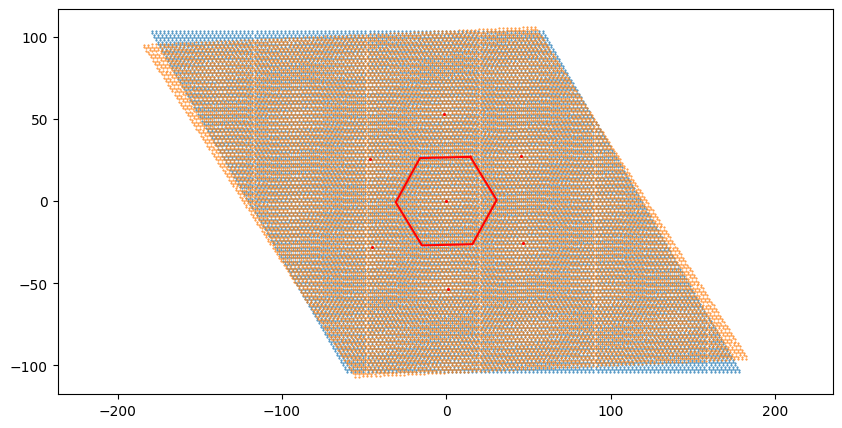

In [9]:
plt.axes().set_aspect('equal', 'datalim')
x1, y1, z1 = coords1.T
x2, y2, z2 = coords2.T
plt.scatter(x1, y1, s=30/twist**2)
plt.scatter(x2, y2, s=30/twist**2)

plt.scatter([0, s1[0], s2[0], -s1[0], -s2[0], s1[0]+s2[0], -s1[0]-s2[0]],
            [0, s1[1], s2[1], -s1[1], -s2[1], s1[1]+s2[1], -s1[1]-s2[1]],s=200/twist**2, 
            c='r')

# corner points
corner1 = np.array(( 2*s1+1*s2)/3)
corner2 = np.array(( 1*s1-1*s2)/3)
corner3 = np.array((-1*s1-2*s2)/3)
corner4 = np.array((-2*s1-1*s2)/3)
corner5 = np.array((-1*s1+1*s2)/3)
corner6 = np.array(( 1*s1+2*s2)/3)


plt.plot(
    [corner1[0], corner2[0], corner3[0], corner4[0], corner5[0], corner6[0], corner1[0]],
    [corner1[1], corner2[1], corner3[1], corner4[1], corner5[1], corner6[1], corner1[1]],
    c='r')

plt.savefig('lattice.png', dpi=300)